# Introduction to Hypothesis Testing

Permutation sampling is great way to simulate the hypothesis that the two variable have identical probability distributions  

Assesement of observed data assuming our hypothesis to be true

![Screen%20Shot%202019-03-02%20at%2012.2![Screen%20Shot%202019-03-02%20at%2012.21.31%20PM.png](attachment:Screen%20Shot%202019-03-02%20at%2012.21.31%20PM.png)1.21%20PM.png](attachment:Screen%20Shot%202019-03-02%20at%2012.21.21%20PM.png)
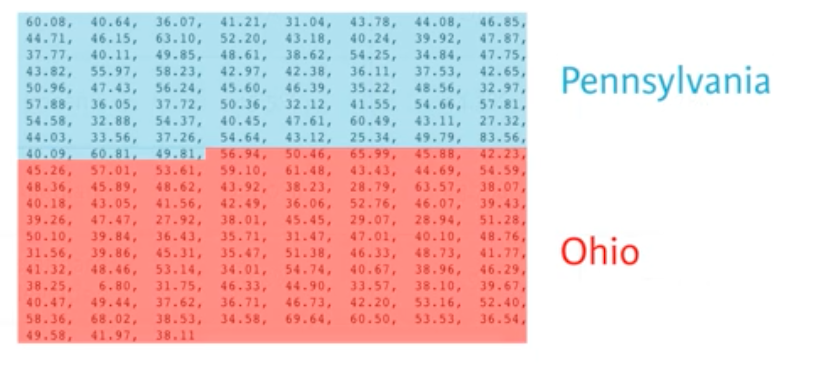

Putting Pennesylvania and Ohio Together and then ignore what state they belong to..  
Next randomly scrammble the order of county
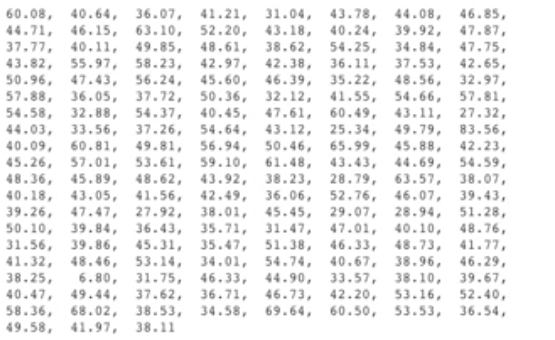

Then re- label first 67 Pennyslvania and the remaing ones to be ohio.
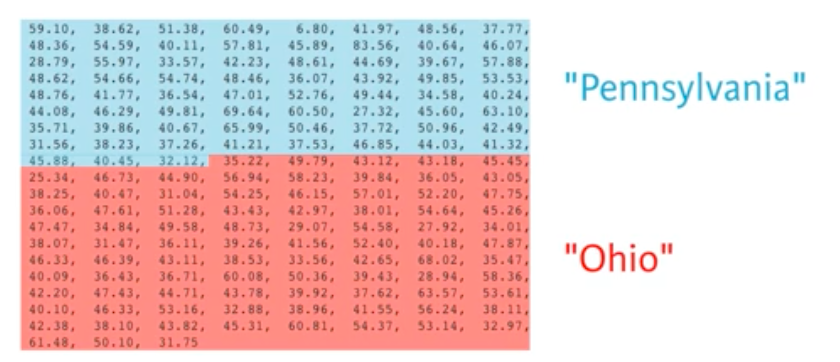

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style = "darkgrid")

In [3]:
# Helper function to generating x, y points value to plot empirical cumulative distribution
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1)/len(data)
    return x, y

# draw_bs_reps(data, func, size=1), which generates many bootstrap replicates from the data set. 
def draw_bs_reps(data, func, size = 1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))
        
    return bs_replicates

Here is function to generate permutation sample from two data sets

In [4]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))
    # Permute the concatenated array: permuted_data
    permutated_data=  np.random.permutation(data)
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permutated_data[:len(data1)]
    perm_sample_2 = permutated_data[len(data1):]
    
    return perm_sample_1, perm_sample_2
    
    

### Visualizing Permutation Sampling

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in **July** (a dry month) and **November** (a wet month). We expect these might be **differently distributed**, so we will take permutation samples to see how their **ECDFs** would look if they were identically distributed.



In [5]:
rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])

rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

print(rain_june.shape)
print(rain_november.shape)

(133,)
(133,)


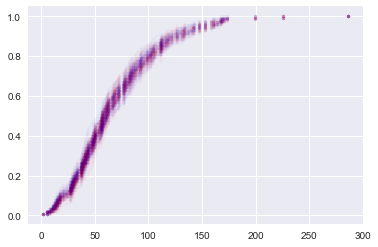

In [6]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1 , perm_sample_2 = permutation_sample(rain_june, rain_november)
    # Compute ECDFs
    x_1 , y_1 = ecdf(perm_sample_1)
    x_2 , y_2 = ecdf(perm_sample_2)
    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker = '.', linestyle = 'none', color = 'red', alpha = 0.02)
    _ = plt.plot(x_2, y_2, marker = '.', linestyle = 'none', color = 'blue', alpha = 0.02)
    


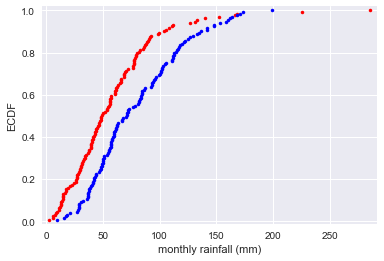

In [7]:
# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')
# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Great work! Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. July and November rainfall are not identically distributed.

Null Hypothesis : The june and nov rainfall data is differently distributed 
Alternate Hypothesis :The june and nov rainfall data is identically distributed 
To reject the null hypothesis we did some permutation sampling 50 times  and plotted them and found that,  permutation samples ECDFs overlap and give a purple haze. 

**None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data.**

Therefore we fail to reject our NUll Hypoethesis


# Test statistic and p-value

A **test statistic** is a single number that can be computed from the observed data and from the data we simulate under the null hypothesis 

The **p-value** is a measure of strength of evidence against the null hypothesis.  
The p-value is the probability of getting the observed value of the test statistic , or a value with even grater evidence against H0, **if the null hypothesis is true.**
Smaller the p-value, the greater the evidence against the null hypothesis.   

  
  If we have given significance level @, then reject the null hypothesis H0,
   if p-value <= @

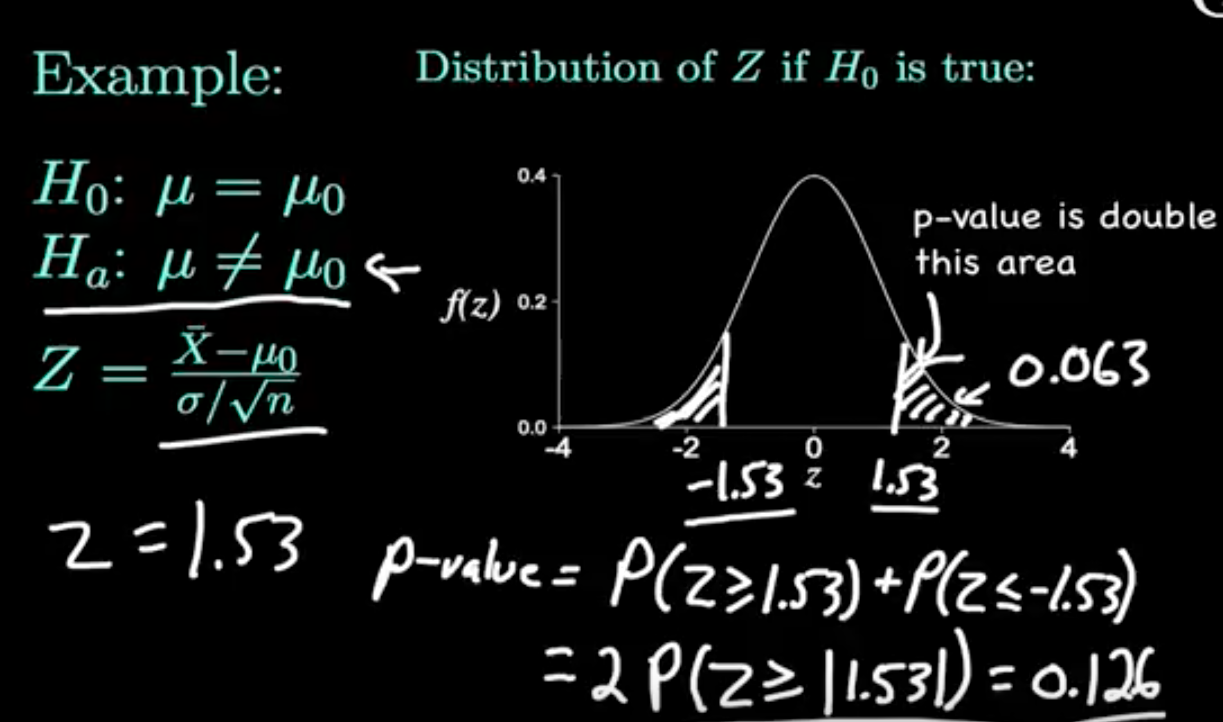

Permutation replicate is a single value of a statistic computed from a permutation sample.

In [8]:
def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [9]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)- np.mean(data_2)

    return diff

## Look before you leap: EDA before hypothesis testing



Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, df, where column ID is the identity of the frog and column impact_force is the impact force in Newtons (N).



In [10]:
ID = np.array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B'], dtype=object)

impact_force = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 , 0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502,
       0.273, 0.72 , 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402,
       0.605, 0.711, 0.614, 0.468])

force_a = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])
force_b = np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])
print(ID.shape)
print(impact_force.shape)
print(force_a.shape, force_b.shape)

(40,)
(40,)
(20,) (20,)


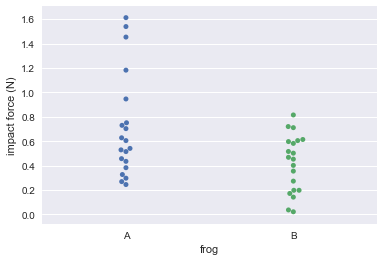

In [11]:
_ = sns.swarmplot(ID, impact_force)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()


## Permutation test on frog Data

The value of test statistic computed from permutation sample is called permutation replicate   

We will compute the probability of getting at least a 0.29 N difference in mean strike force  **under the hypothesis that the distributions of strike forces for the two frogs are identical***. We use a permutation test with a test statistic of the difference of means to test this hypothesis.




In [12]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a ,force_b)
# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
# Reporting the fraction of bootstrap replicate that are greater than or equal to the test statistic(empirical_diff_means)
# We know that p-value is a measure of strength of evidence against the null hypothesis.
# So we are interested in perm_replicates that have higher value than observed test statistic 
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result|
print('p-value =', p)

p-value = 0.0042


In [13]:
perm_replicates

array([-0.15815,  0.06555, -0.18555, ...,  0.02805,  0.16675, -0.15965])

The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!



## A one sample bootstrap test

### Pipeline for hypothesis testing
* Clearly state the null hypothesis
* Define your test statistic
* Generate many sets of simulated data assuming the null hypothesis is true
* Compute the test statistic for each simulated data set
* The p-value is the fraction of our simulated data sets for which the test statistic is atleast as extreme as for the real data

Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N.  
**Null Hypothesis:** The mean strike force of Frog B is equal to that of Frog C  
To set up the bootstrap hypothesis test, you will take the **mean as our test statistic**.   
  
Our goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. 

In [149]:
# Make an array of translated impact forces: translated_force_b
# A set of simulated data assuming the null hypothesis( mean B==C) is true
translated_force_b = force_b - np.mean(force_b)+0.55


In [150]:
# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)


In [151]:
# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0058


The low p-value suggests that the **null hypothesis** that Frog B and Frog C have the same mean impact force is **false**.

## A two sample bootstrap hypothesis test for difference of means

We now want to **test the hypothesis** that Frog A and Frog B have the **same mean** impact force, but not necessarily the same distribution, which is also impossible with a permutation test.  

NULL Hypothesis : frog A and frog B have same mean.  
test statistic : mean.  



Here NULL hypothesis is frog A and frog have same mean. So we need to shift the value of frog A mean to match with frog B mean.   
**Step 1**: We will need the concatenated mean ( mean of force with mean of force b). This is where we want other two mean to be shifted.

In [152]:
# Compute mean of all forces: mean_force
forces_concat = np.concatenate((force_a, force_b))
mean_force = np.mean(forces_concat)
print('mean_force:', mean_force)
print('force_a mean:', np.mean(force_a), ', force_b mean:', np.mean(force_b))

mean_force: 0.563225
force_a mean: 0.7073500000000001 , force_b mean: 0.4191000000000001


**Step 2**: Generate set of simulated data assuming the null hypothesis is true.  
            Shift force_a  and force_b mean to match concatenated mean_force..  


In [153]:
# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force
print('force_a_shifted mean', np.mean(force_a_shifted))
print('force_b_shifted mean', np.mean(force_b_shifted))

force_a_shifted mean 0.5632249999999999
force_b_shifted mean 0.5632249999999999


**Step 3:** Compute the test statistic for each simulated data set.  
Generate many sets of simulated data assuming the null hypothesis is true

In [154]:

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

**Step 4:** The p-value is the fraction of our simulated data sets for which the test statistic is atleast as extreme as for the real data

In [155]:
# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0045


# Hypothesis Testing Examples


## A/B Testing  
Used By Organization to see if strategy change gives a better result

Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?   

**Hypothesis** :  the party of a House member has no bearing on his or her vote.  
 **test statistic:** fraction of Democrats voting in favor   
 
Permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.
 



In [156]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True]*136+[False]*35)

In [157]:
def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac


In [158]:
# Acquire permutation samples: perm_replicates
# permutation of replicates would 10000 replicates of fraction of democrats 
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)
# Generate many sets of simulated data assuming the null hypothesis is true

In [159]:
perm_replicates = perm_replicates[~np.isnan(perm_replicates)]

In [162]:
# Compute and print p-value: p
# The number of replicates where the test statistic is ateast as great as what we observed
p = np.sum(perm_replicates <= (153/244)) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0001


Smaller value of p signifies the greater evidence against null hypothesis(the party of a House member has no bearing on his or her vote.)

Comparison : Yup! The "Democrats" are those who view the ad before the color change, and the "Republicans" are those who view it after.



### A time-on-website analog

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers.   

In this problem you will:   
* perform an A/B test to determine **if these rule changes resulted in a slower rate of no-hitters** (i.e., longer average time between no-hitters)   
* using the **difference in mean inter-no-hitter time as your test statistic**.


In [14]:
# here is the required data
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])

nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

print(nht_dead.size, nht_live.size)

91 203


In [17]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)
nht_diff_obs

-345.0011367942402

In [20]:
# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, 10000)


In [21]:
# Compute and print the p-value: p
# perm_replicates values should be less than observed test statistic as it signifies the argument against
# the Null hypothesis (that rule change does NOT resulted in a slower rate of no hitters)

p = np.sum(perm_replicates <= nht_diff_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0003


Smaller value of p signifies the greater evidence against null hypothesis(if these rule changes resulted in a slower rate of no-hitters.)   
Your p-value is 0.0001, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.



# Test of correlation

## Hypothesis test on Pearson correlation



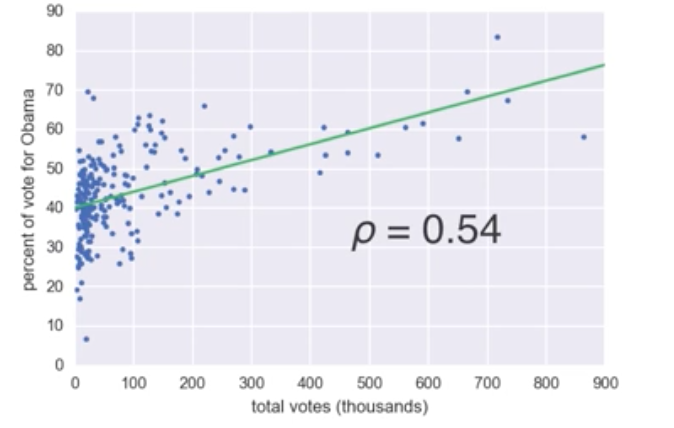

Pearson correlation coefficient p, is a measure of how much variability in two variables is due to being correlated.  
It ranges from -1 to +1 to positively correlated. p=0.54 signfies the data are perfect but are correlated .   



1. How can be know for sure if this correlation is real or it could just happen by chance?  
**We can do hypothesis test.**


* We can put forward NULL hypothesis the two variables are totaly unrelated. 
* Then simulate the hypothesis assuming NULL hypothesis to be TRUE.
* Use pearson correlation coefficient(p) as test statistic.
* Compute p-values as fraction of replicates that have pear. coeff (p) at
least as large as observed




The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. 
To do so, **permute the illiteracy values** but leave the fertility values fixed.   
**This simulates the hypothesis that they are totally independent of each other.**  
For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.



In [190]:
# Computing the Pearson correlation coefficient

def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]


In [208]:
illiteracy = np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])

fertility = np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])

In [211]:
print(illiteracy.shape)
print(fertility.shape)

(162,)
(162,)


In [213]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)


In [214]:
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)


In [215]:
# Simulating the hypothesis assuming null hypothesis(unrelated) to be true
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy )

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p# think against NULL hypothesis
p = np.sum(perm_replicates >= r_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


You got a p-value of zero. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.

This reject the hypothesis(they are totally independent of each other.)


0.8041324026815341


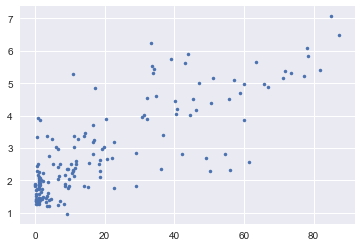

In [221]:
plt.plot(illiteracy, fertility,marker = '.', linestyle = 'none')
print(r_obs)

### Do neonicotinoid insecticides have unintended consequences?

We will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees (stored in the Numpy array control) and bees treated with pesticide (stored in the Numpy array treated).



In [231]:
control= np.array([ 4.159234,  4.408002,  0.172812,  3.498278,  3.104912,  5.164174,
        6.615262,  4.633066,  0.170408,  2.65    ,  0.0875  ,  1.997148,
        6.92668 ,  4.574932,  3.896466,  5.209814,  3.70625 ,  0.      ,
        4.62545 ,  3.01444 ,  0.732652,  0.4     ,  6.518382,  5.225   ,
        6.218742,  6.840358,  1.211308,  0.368252,  3.59937 ,  4.212158,
        6.052364,  2.115532,  6.60413 ,  5.26074 ,  6.05695 ,  6.481172,
        3.171522,  3.057228,  0.218808,  5.215112,  4.465168,  2.28909 ,
        3.732572,  2.17087 ,  1.834326,  6.074862,  5.841978,  8.524892,
        4.698492,  2.965624,  2.324206,  3.409412,  4.830726,  0.1     ,
        0.      ,  4.101432,  3.478162,  1.009688,  4.999296,  4.32196 ,
        0.299592,  3.606032,  7.54026 ,  4.284024,  0.057494,  6.036668,
        2.924084,  4.150144,  1.256926,  4.666502,  4.806594,  2.52478 ,
        2.027654,  2.52283 ,  4.735598,  2.033236,  0.      ,  6.177294,
        2.601834,  3.544408,  3.6045  ,  5.520346,  4.80698 ,  3.002478,
        3.559816,  7.075844, 10.      ,  0.139772,  6.17171 ,  3.201232,
        8.459546,  0.17857 ,  7.088276,  5.496662,  5.415086,  1.932282,
        3.02838 ,  7.47996 ,  1.86259 ,  7.838498,  2.242718,  3.292958,
        6.363644,  4.386898,  8.47533 ,  4.156304,  1.463956,  4.533628,
        5.573922,  1.29454 ,  7.547504,  3.92466 ,  5.820258,  4.118522,
        4.125   ,  2.286698,  0.591882,  1.273124,  0.      ,  0.      ,
        0.      , 12.22502 ,  7.601604,  5.56798 ,  1.679914,  8.77096 ,
        5.823942,  0.258374,  0.      ,  5.899236,  5.486354,  2.053148,
        3.25541 ,  2.72564 ,  3.364066,  2.43427 ,  5.282548,  3.963666,
        0.24851 ,  0.347916,  4.046862,  5.461436,  4.066104,  0.      ,
        0.065   ])


treated = np.array([1.342686, 1.058476, 3.793784, 0.40428 , 4.528388, 2.142966,
       3.937742, 0.1375  , 6.919164, 0.      , 3.597812, 5.196538,
       2.78955 , 2.3229  , 1.090636, 5.323916, 1.021618, 0.931836,
       2.78    , 0.412202, 1.180934, 2.8674  , 0.      , 0.064354,
       3.008348, 0.876634, 0.      , 4.971712, 7.280658, 4.79732 ,
       2.084956, 3.251514, 1.9405  , 1.566192, 0.58894 , 5.219658,
       0.977976, 3.124584, 1.297564, 1.433328, 4.24337 , 0.880964,
       2.376566, 3.763658, 1.918426, 3.74    , 3.841726, 4.69964 ,
       4.386876, 0.      , 1.127432, 1.845452, 0.690314, 4.185602,
       2.284732, 7.237594, 2.185148, 2.799124, 3.43218 , 0.63354 ,
       1.142496, 0.586   , 2.372858, 1.80032 , 3.329306, 4.028804,
       3.474156, 7.508752, 2.032824, 1.336556, 1.906496, 1.396046,
       2.488104, 4.759114, 1.07853 , 3.19927 , 3.814252, 4.275962,
       2.817056, 0.552198, 3.27194 , 5.11525 , 2.064628, 0.      ,
       3.34101 , 6.177322, 0.      , 3.66415 , 2.352582, 1.531696])

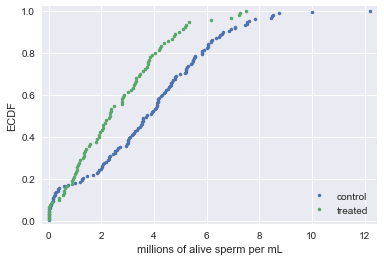

In [232]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()


The ECDFs show a pretty clear difference between the treatment and control; **treated bees have fewer alive sperm**. Let's now do a hypothesis test in the next exercise.



#### Bootstrap hypothesis test on bee sperm counts
We will test the following   
**Hypothesis**: On average, male bees **treated** with neonicotinoid insecticide have the **same number of active sperm per milliliter of semen** than do **untreated** male bees.   
We will use the difference of means as your **test statistic**.

In [233]:
# Compute the difference in mean sperm count: diff_means # test statistic
diff_means = diff_of_means(control, treated)


In [237]:
# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets $satyam according to Null hypothesis
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count


In [238]:
# Generate bootstrap replicates $satyam according to Null hypothesis
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)



In [239]:
# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

In [240]:
# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)


p-value = 0.0
